In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn import metrics 
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [26]:
#loading data
file_1="/workspaces/State-of-Health-Estimation-Battery/Dataset/B0005_dis_dataset.csv"
dataset=pd.read_csv(file_1)

In [27]:
Soh=dataset["capacity"]/2

In [28]:
# normalising data
dataset=dataset[["cycle","capacity","voltage_measured","current_measured","temperature_measured","current_load","voltage_load"]]
df_norm = (dataset-dataset.min())/(dataset.max()-dataset.min())
att=["cycle","current_load"]

In [29]:
df_norm["Soh"]=Soh

In [30]:
X = df_norm[att]
Y = df_norm[["Soh"]]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0) 

In [32]:
#sorting data wrt to index
X_test = X_test.sort_index(axis=0)
X_train= X_train.sort_index(axis=0)
y_train= y_train.sort_index(axis=0)
y_test = y_test.sort_index(axis=0)

In [33]:
svr1= SVR(kernel='rbf', C=1, gamma='scale')
svr1.fit(X_train,y_train.values.ravel())
y_pred_1= svr1.predict(X_test)

In [34]:
svr2= SVR(kernel='linear', C=1, gamma='scale')
svr2.fit(X_train,y_train.values.ravel())
y_pred_2= svr2.predict(X_test)

In [35]:
svr3_1= SVR(kernel='poly', C=1, gamma='scale', degree=1)
svr3_1.fit(X_train,y_train.values.ravel())
y_pred_3_1= svr3_1.predict(X_test)

In [36]:
svr3_2 = SVR(kernel='poly', C=1, gamma='scale', degree=2)
svr3_2.fit(X_train,y_train.values.ravel())
y_pred_3_2= svr3_2.predict(X_test)

In [37]:
svr3_3= SVR(kernel='poly', C=1, gamma='scale', degree=3)
svr3_3.fit(X_train,y_train.values.ravel())
y_pred_3_3= svr3_3.predict(X_test)

In [38]:
svr3_4= SVR(kernel='poly', C=1, gamma='scale', degree=4)
svr3_4.fit(X_train,y_train.values.ravel())
y_pred_3_4= svr3_4.predict(X_test)

In [39]:
svr3_5= SVR(kernel='poly', C=1, gamma='scale', degree=5)
svr3_5.fit(X_train,y_train.values.ravel())
y_pred_3_5= svr3_5.predict(X_test)

In [40]:
def graph_plot(a,model):
    plt.plot(X_test["cycle"],y_test,color='red',label='actual',linewidth=4)
    plt.plot(X_test["cycle"],a,color='cyan',label='SVM-'+model,linewidth=1)
    plt.xlabel("cycle")
    plt.ylabel("SOH")
    rmse="Rmse = "+str(np.sqrt(metrics.mean_squared_error(y_test, a)))
    plt.figtext(0.33, -0.03, rmse, fontsize=10)
    plt.legend(loc="upper right")
    plt.suptitle("Support Vector Regressor kernal:"+model)
    plt.show()
    print(np.sqrt(metrics.mean_squared_error(y_test, a)))

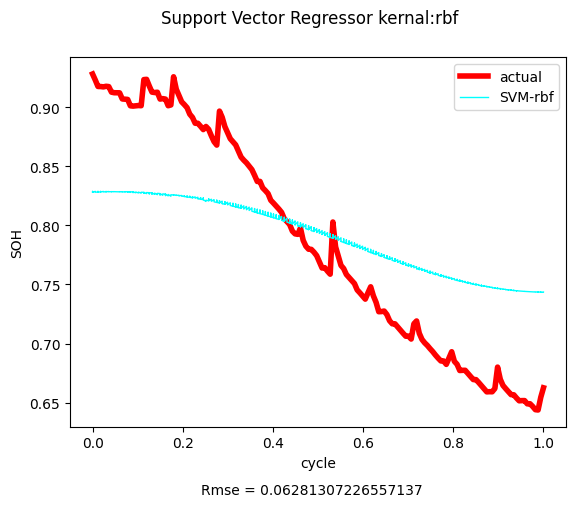

0.06281307226557137


In [41]:
graph_plot(y_pred_1,"rbf")

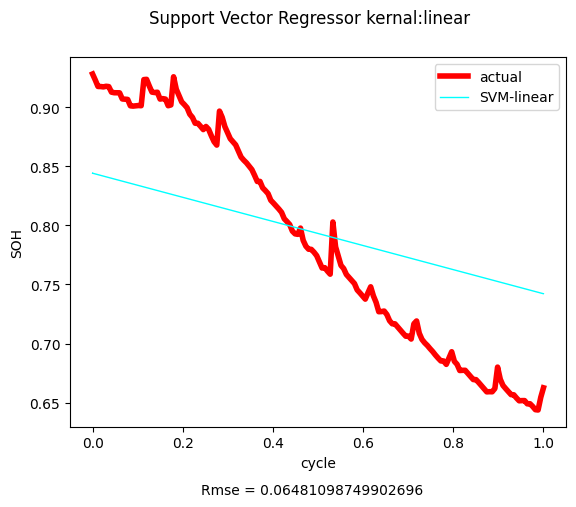

0.06481098749902696


In [42]:
graph_plot(y_pred_2,"linear")

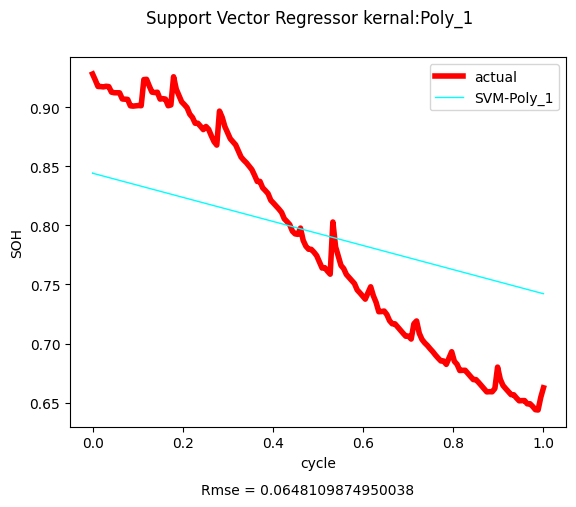

0.0648109874950038


In [43]:
graph_plot(y_pred_3_1,"Poly_1")

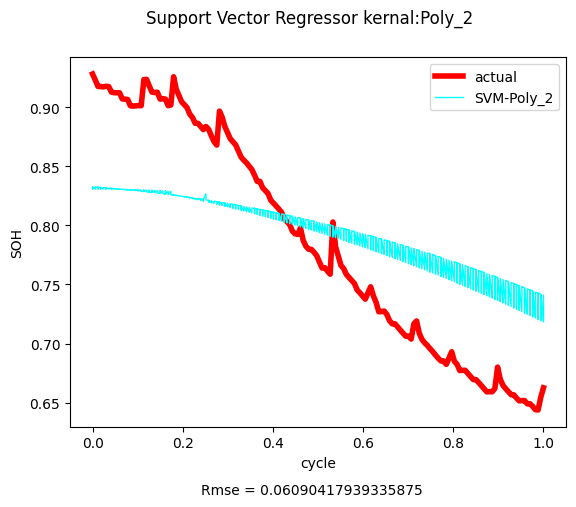

0.06090417939335875


In [44]:
graph_plot(y_pred_3_2,"Poly_2")

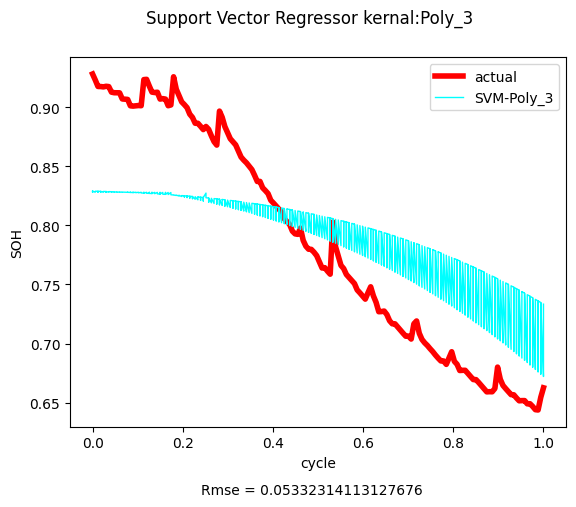

0.05332314113127676


In [45]:
graph_plot(y_pred_3_3,"Poly_3")

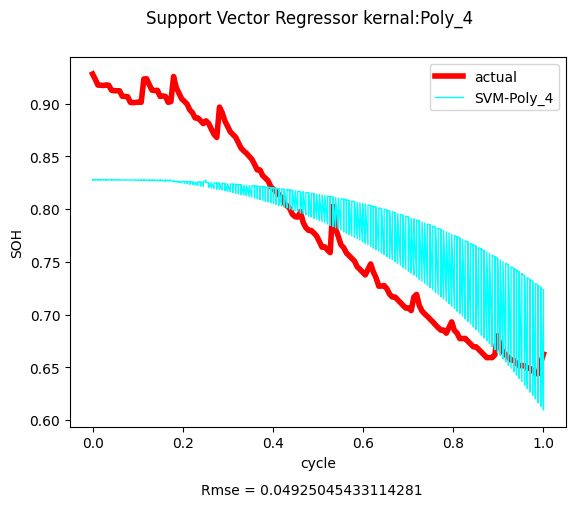

0.04925045433114281


In [46]:
graph_plot(y_pred_3_4,"Poly_4")

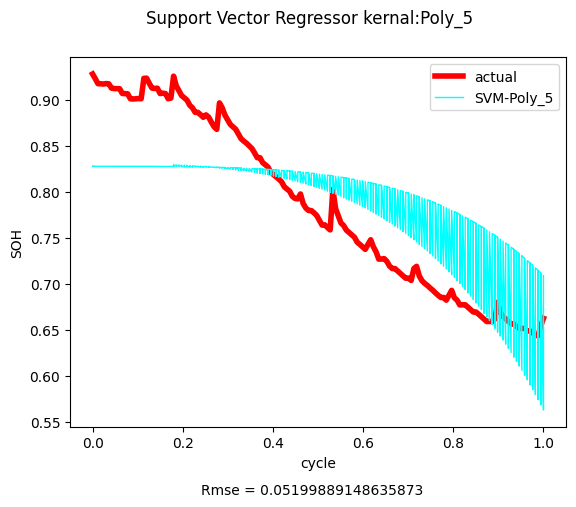

0.05199889148635873


In [47]:
graph_plot(y_pred_3_5,"Poly_5")